In [1]:
import os
import numpy as np
import time

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

import pandas as pd
import seaborn as sns

import csv

%matplotlib inline 

In [2]:
# base directory
base_dir = "/home/dmsai2/Desktop/DCC2022/data"
processed_dir = "/home/dmsai2/Desktop/DCC2022/pdata"
sub_data_dir = "/home/dmsai2/Desktop/DCC2022/tdata"

In [3]:
# load class list from directory
cls_list = os.listdir(base_dir)
print(*cls_list)

L2_21 L2_24 L2_15 L2_27 L2_30 L2_50 L2_40 L2_39 L2_20 L2_45 L2_3 L2_12 L2_41 L2_10 L2_34 L2_52 L2_33 L2_46 L2_44 L2_25


In [34]:
numdata = 0
numclass = 0
data_list = {}

for cls in cls_list:
    imlist = os.listdir(base_dir + "/" + cls)
    print(cls, end=' : ')
    print(len(imlist))
    numdata = numdata + len(imlist)
    data_list[cls] = imlist
    print("-"*12)

numclass = len(cls_list)

print("num of class :", numclass)
print("num of data :", numdata)

L2_21 : 410
------------
L2_24 : 782
------------
L2_15 : 1509
------------
L2_27 : 426
------------
L2_30 : 364
------------
L2_50 : 781
------------
L2_40 : 180
------------
L2_39 : 454
------------
L2_20 : 410
------------
L2_45 : 631
------------
L2_3 : 595
------------
L2_12 : 518
------------
L2_41 : 593
------------
L2_10 : 1893
------------
L2_34 : 419
------------
L2_52 : 382
------------
L2_33 : 6206
------------
L2_46 : 2214
------------
L2_44 : 547
------------
L2_25 : 6189
------------
num of class : 20
num of data : 25503


In [32]:
numsubcls = 0
subcls_list = {}

for cls in cls_list:
    sub_list = os.listdir(sub_data_dir + "/" + cls)
    subcls_list[cls] = sub_list
    
numsubcls = len(subcls_list)
print("num of subclass :", numsubcls)

num of subclass : 20


In [37]:
data = []
cnt = 0

for label in data_list.keys():
    for subcls in subcls_list[label]:
        subcls_path = f"{sub_data_dir}/{label}/{subcls}"
        imglist = os.listdir(subcls_path)
        
        for img_dir in imglist:
            img_path = f"{subcls_path}/{img_dir}"
            img = Image.open(img_path)
            imgarr = np.array(img)
            if len(imgarr.shape) == 2:
                w, h = imgarr.shape
                c = 1
            else:
                w, h, c = imgarr.shape
            fsize = (os.path.getsize(img_path) / 1024.)
            fmtime = time.ctime(os.path.getmtime(img_path))
            data.append([img_dir[:-4], label, img_dir[-3:], img.mode, fsize, fmtime, w, h, c, subcls])
            cnt += 1
            print(f"{(int((cnt / numdata) * 100000.) / 1000.)}% - {cnt}/{numdata}")

0.003% - 1/25503
0.007% - 2/25503
0.011% - 3/25503
0.015% - 4/25503
0.019% - 5/25503
0.023% - 6/25503
0.027% - 7/25503
0.031% - 8/25503
0.035% - 9/25503
0.039% - 10/25503
0.043% - 11/25503
0.047% - 12/25503
0.05% - 13/25503
0.054% - 14/25503
0.058% - 15/25503
0.062% - 16/25503
0.066% - 17/25503
0.07% - 18/25503
0.074% - 19/25503
0.078% - 20/25503
0.082% - 21/25503
0.086% - 22/25503
0.09% - 23/25503
0.094% - 24/25503
0.098% - 25/25503
0.101% - 26/25503
0.105% - 27/25503
0.109% - 28/25503
0.113% - 29/25503
0.117% - 30/25503
0.121% - 31/25503
0.125% - 32/25503
0.129% - 33/25503
0.133% - 34/25503
0.137% - 35/25503
0.141% - 36/25503
0.145% - 37/25503
0.149% - 38/25503
0.152% - 39/25503
0.156% - 40/25503
0.16% - 41/25503
0.164% - 42/25503
0.168% - 43/25503
0.172% - 44/25503
0.176% - 45/25503
0.18% - 46/25503
0.184% - 47/25503
0.188% - 48/25503
0.192% - 49/25503
0.196% - 50/25503
0.199% - 51/25503
0.203% - 52/25503
0.207% - 53/25503
0.211% - 54/25503
0.215% - 55/25503
0.219% - 56/25503
0.223%

1.842% - 470/25503
1.846% - 471/25503
1.85% - 472/25503
1.854% - 473/25503
1.858% - 474/25503
1.862% - 475/25503
1.866% - 476/25503
1.87% - 477/25503
1.874% - 478/25503
1.878% - 479/25503
1.882% - 480/25503
1.886% - 481/25503
1.889% - 482/25503
1.893% - 483/25503
1.897% - 484/25503
1.901% - 485/25503
1.905% - 486/25503
1.909% - 487/25503
1.913% - 488/25503
1.917% - 489/25503
1.921% - 490/25503
1.925% - 491/25503
1.929% - 492/25503
1.933% - 493/25503
1.937% - 494/25503
1.94% - 495/25503
1.944% - 496/25503
1.948% - 497/25503
1.952% - 498/25503
1.956% - 499/25503
1.96% - 500/25503
1.964% - 501/25503
1.968% - 502/25503
1.972% - 503/25503
1.976% - 504/25503
1.98% - 505/25503
1.984% - 506/25503
1.988% - 507/25503
1.991% - 508/25503
1.995% - 509/25503
1.999% - 510/25503
2.003% - 511/25503
2.007% - 512/25503
2.011% - 513/25503
2.015% - 514/25503
2.019% - 515/25503
2.023% - 516/25503
2.027% - 517/25503
2.031% - 518/25503
2.035% - 519/25503
2.038% - 520/25503
2.042% - 521/25503
2.046% - 522/2550

3.564% - 909/25503
3.568% - 910/25503
3.572% - 911/25503
3.576% - 912/25503
3.579% - 913/25503
3.583% - 914/25503
3.587% - 915/25503
3.591% - 916/25503
3.595% - 917/25503
3.599% - 918/25503
3.603% - 919/25503
3.607% - 920/25503
3.611% - 921/25503
3.615% - 922/25503
3.619% - 923/25503
3.623% - 924/25503
3.627% - 925/25503
3.63% - 926/25503
3.634% - 927/25503
3.638% - 928/25503
3.642% - 929/25503
3.646% - 930/25503
3.65% - 931/25503
3.654% - 932/25503
3.658% - 933/25503
3.662% - 934/25503
3.666% - 935/25503
3.67% - 936/25503
3.674% - 937/25503
3.677% - 938/25503
3.681% - 939/25503
3.685% - 940/25503
3.689% - 941/25503
3.693% - 942/25503
3.697% - 943/25503
3.701% - 944/25503
3.705% - 945/25503
3.709% - 946/25503
3.713% - 947/25503
3.717% - 948/25503
3.721% - 949/25503
3.725% - 950/25503
3.728% - 951/25503
3.732% - 952/25503
3.736% - 953/25503
3.74% - 954/25503
3.744% - 955/25503
3.748% - 956/25503
3.752% - 957/25503
3.756% - 958/25503
3.76% - 959/25503
3.764% - 960/25503
3.768% - 961/2550

5.215% - 1330/25503
5.218% - 1331/25503
5.222% - 1332/25503
5.226% - 1333/25503
5.23% - 1334/25503
5.234% - 1335/25503
5.238% - 1336/25503
5.242% - 1337/25503
5.246% - 1338/25503
5.25% - 1339/25503
5.254% - 1340/25503
5.258% - 1341/25503
5.262% - 1342/25503
5.266% - 1343/25503
5.269% - 1344/25503
5.273% - 1345/25503
5.277% - 1346/25503
5.281% - 1347/25503
5.285% - 1348/25503
5.289% - 1349/25503
5.293% - 1350/25503
5.297% - 1351/25503
5.301% - 1352/25503
5.305% - 1353/25503
5.309% - 1354/25503
5.313% - 1355/25503
5.317% - 1356/25503
5.32% - 1357/25503
5.324% - 1358/25503
5.328% - 1359/25503
5.332% - 1360/25503
5.336% - 1361/25503
5.34% - 1362/25503
5.344% - 1363/25503
5.348% - 1364/25503
5.352% - 1365/25503
5.356% - 1366/25503
5.36% - 1367/25503
5.364% - 1368/25503
5.367% - 1369/25503
5.371% - 1370/25503
5.375% - 1371/25503
5.379% - 1372/25503
5.383% - 1373/25503
5.387% - 1374/25503
5.391% - 1375/25503
5.395% - 1376/25503
5.399% - 1377/25503
5.403% - 1378/25503
5.407% - 1379/25503
5.411

7.057% - 1800/25503
7.061% - 1801/25503
7.065% - 1802/25503
7.069% - 1803/25503
7.073% - 1804/25503
7.077% - 1805/25503
7.081% - 1806/25503
7.085% - 1807/25503
7.089% - 1808/25503
7.093% - 1809/25503
7.097% - 1810/25503
7.101% - 1811/25503
7.105% - 1812/25503
7.108% - 1813/25503
7.112% - 1814/25503
7.116% - 1815/25503
7.12% - 1816/25503
7.124% - 1817/25503
7.128% - 1818/25503
7.132% - 1819/25503
7.136% - 1820/25503
7.14% - 1821/25503
7.144% - 1822/25503
7.148% - 1823/25503
7.152% - 1824/25503
7.156% - 1825/25503
7.159% - 1826/25503
7.163% - 1827/25503
7.167% - 1828/25503
7.171% - 1829/25503
7.175% - 1830/25503
7.179% - 1831/25503
7.183% - 1832/25503
7.187% - 1833/25503
7.191% - 1834/25503
7.195% - 1835/25503
7.199% - 1836/25503
7.203% - 1837/25503
7.206% - 1838/25503
7.21% - 1839/25503
7.214% - 1840/25503
7.218% - 1841/25503
7.222% - 1842/25503
7.226% - 1843/25503
7.23% - 1844/25503
7.234% - 1845/25503
7.238% - 1846/25503
7.242% - 1847/25503
7.246% - 1848/25503
7.25% - 1849/25503
7.254

8.732% - 2227/25503
8.736% - 2228/25503
8.74% - 2229/25503
8.744% - 2230/25503
8.747% - 2231/25503
8.751% - 2232/25503
8.755% - 2233/25503
8.759% - 2234/25503
8.763% - 2235/25503
8.767% - 2236/25503
8.771% - 2237/25503
8.775% - 2238/25503
8.779% - 2239/25503
8.783% - 2240/25503
8.787% - 2241/25503
8.791% - 2242/25503
8.795% - 2243/25503
8.798% - 2244/25503
8.802% - 2245/25503
8.806% - 2246/25503
8.81% - 2247/25503
8.814% - 2248/25503
8.818% - 2249/25503
8.822% - 2250/25503
8.826% - 2251/25503
8.83% - 2252/25503
8.834% - 2253/25503
8.838% - 2254/25503
8.842% - 2255/25503
8.846% - 2256/25503
8.849% - 2257/25503
8.853% - 2258/25503
8.857% - 2259/25503
8.861% - 2260/25503
8.865% - 2261/25503
8.869% - 2262/25503
8.873% - 2263/25503
8.877% - 2264/25503
8.881% - 2265/25503
8.885% - 2266/25503
8.889% - 2267/25503
8.893% - 2268/25503
8.896% - 2269/25503
8.9% - 2270/25503
8.904% - 2271/25503
8.908% - 2272/25503
8.912% - 2273/25503
8.916% - 2274/25503
8.92% - 2275/25503
8.924% - 2276/25503
8.928%

10.336% - 2636/25503
10.339% - 2637/25503
10.343% - 2638/25503
10.347% - 2639/25503
10.351% - 2640/25503
10.355% - 2641/25503
10.359% - 2642/25503
10.363% - 2643/25503
10.367% - 2644/25503
10.371% - 2645/25503
10.375% - 2646/25503
10.379% - 2647/25503
10.383% - 2648/25503
10.387% - 2649/25503
10.39% - 2650/25503
10.394% - 2651/25503
10.398% - 2652/25503
10.402% - 2653/25503
10.406% - 2654/25503
10.41% - 2655/25503
10.414% - 2656/25503
10.418% - 2657/25503
10.422% - 2658/25503
10.426% - 2659/25503
10.43% - 2660/25503
10.434% - 2661/25503
10.437% - 2662/25503
10.441% - 2663/25503
10.445% - 2664/25503
10.449% - 2665/25503
10.453% - 2666/25503
10.457% - 2667/25503
10.461% - 2668/25503
10.465% - 2669/25503
10.469% - 2670/25503
10.473% - 2671/25503
10.477% - 2672/25503
10.481% - 2673/25503
10.485% - 2674/25503
10.488% - 2675/25503
10.492% - 2676/25503
10.496% - 2677/25503
10.5% - 2678/25503
10.504% - 2679/25503
10.508% - 2680/25503
10.512% - 2681/25503
10.516% - 2682/25503
10.52% - 2683/2550

11.908% - 3037/25503
11.912% - 3038/25503
11.916% - 3039/25503
11.92% - 3040/25503
11.924% - 3041/25503
11.928% - 3042/25503
11.931% - 3043/25503
11.935% - 3044/25503
11.939% - 3045/25503
11.943% - 3046/25503
11.947% - 3047/25503
11.951% - 3048/25503
11.955% - 3049/25503
11.959% - 3050/25503
11.963% - 3051/25503
11.967% - 3052/25503
11.971% - 3053/25503
11.975% - 3054/25503
11.978% - 3055/25503
11.982% - 3056/25503
11.986% - 3057/25503
11.99% - 3058/25503
11.994% - 3059/25503
11.998% - 3060/25503
12.002% - 3061/25503
12.006% - 3062/25503
12.01% - 3063/25503
12.014% - 3064/25503
12.018% - 3065/25503
12.022% - 3066/25503
12.026% - 3067/25503
12.029% - 3068/25503
12.033% - 3069/25503
12.037% - 3070/25503
12.041% - 3071/25503
12.045% - 3072/25503
12.049% - 3073/25503
12.053% - 3074/25503
12.057% - 3075/25503
12.061% - 3076/25503
12.065% - 3077/25503
12.069% - 3078/25503
12.073% - 3079/25503
12.077% - 3080/25503
12.08% - 3081/25503
12.084% - 3082/25503
12.088% - 3083/25503
12.092% - 3084/25

13.457% - 3432/25503
13.461% - 3433/25503
13.465% - 3434/25503
13.469% - 3435/25503
13.472% - 3436/25503
13.476% - 3437/25503
13.48% - 3438/25503
13.484% - 3439/25503
13.488% - 3440/25503
13.492% - 3441/25503
13.496% - 3442/25503
13.5% - 3443/25503
13.504% - 3444/25503
13.508% - 3445/25503
13.512% - 3446/25503
13.516% - 3447/25503
13.519% - 3448/25503
13.523% - 3449/25503
13.527% - 3450/25503
13.531% - 3451/25503
13.535% - 3452/25503
13.539% - 3453/25503
13.543% - 3454/25503
13.547% - 3455/25503
13.551% - 3456/25503
13.555% - 3457/25503
13.559% - 3458/25503
13.563% - 3459/25503
13.567% - 3460/25503
13.57% - 3461/25503
13.574% - 3462/25503
13.578% - 3463/25503
13.582% - 3464/25503
13.586% - 3465/25503
13.59% - 3466/25503
13.594% - 3467/25503
13.598% - 3468/25503
13.602% - 3469/25503
13.606% - 3470/25503
13.61% - 3471/25503
13.614% - 3472/25503
13.618% - 3473/25503
13.621% - 3474/25503
13.625% - 3475/25503
13.629% - 3476/25503
13.633% - 3477/25503
13.637% - 3478/25503
13.641% - 3479/2550

15.206% - 3878/25503
15.209% - 3879/25503
15.213% - 3880/25503
15.217% - 3881/25503
15.221% - 3882/25503
15.225% - 3883/25503
15.229% - 3884/25503
15.233% - 3885/25503
15.237% - 3886/25503
15.241% - 3887/25503
15.245% - 3888/25503
15.249% - 3889/25503
15.253% - 3890/25503
15.257% - 3891/25503
15.26% - 3892/25503
15.264% - 3893/25503
15.268% - 3894/25503
15.272% - 3895/25503
15.276% - 3896/25503
15.28% - 3897/25503
15.284% - 3898/25503
15.288% - 3899/25503
15.292% - 3900/25503
15.296% - 3901/25503
15.3% - 3902/25503
15.304% - 3903/25503
15.308% - 3904/25503
15.311% - 3905/25503
15.315% - 3906/25503
15.319% - 3907/25503
15.323% - 3908/25503
15.327% - 3909/25503
15.331% - 3910/25503
15.335% - 3911/25503
15.339% - 3912/25503
15.343% - 3913/25503
15.347% - 3914/25503
15.351% - 3915/25503
15.355% - 3916/25503
15.358% - 3917/25503
15.362% - 3918/25503
15.366% - 3919/25503
15.37% - 3920/25503
15.374% - 3921/25503
15.378% - 3922/25503
15.382% - 3923/25503
15.386% - 3924/25503
15.39% - 3925/2550

16.766% - 4276/25503
16.77% - 4277/25503
16.774% - 4278/25503
16.778% - 4279/25503
16.782% - 4280/25503
16.786% - 4281/25503
16.79% - 4282/25503
16.794% - 4283/25503
16.798% - 4284/25503
16.801% - 4285/25503
16.805% - 4286/25503
16.809% - 4287/25503
16.813% - 4288/25503
16.817% - 4289/25503
16.821% - 4290/25503
16.825% - 4291/25503
16.829% - 4292/25503
16.833% - 4293/25503
16.837% - 4294/25503
16.841% - 4295/25503
16.845% - 4296/25503
16.848% - 4297/25503
16.852% - 4298/25503
16.856% - 4299/25503
16.86% - 4300/25503
16.864% - 4301/25503
16.868% - 4302/25503
16.872% - 4303/25503
16.876% - 4304/25503
16.88% - 4305/25503
16.884% - 4306/25503
16.888% - 4307/25503
16.892% - 4308/25503
16.896% - 4309/25503
16.899% - 4310/25503
16.903% - 4311/25503
16.907% - 4312/25503
16.911% - 4313/25503
16.915% - 4314/25503
16.919% - 4315/25503
16.923% - 4316/25503
16.927% - 4317/25503
16.931% - 4318/25503
16.935% - 4319/25503
16.939% - 4320/25503
16.943% - 4321/25503
16.947% - 4322/25503
16.95% - 4323/255

18.346% - 4679/25503
18.35% - 4680/25503
18.354% - 4681/25503
18.358% - 4682/25503
18.362% - 4683/25503
18.366% - 4684/25503
18.37% - 4685/25503
18.374% - 4686/25503
18.378% - 4687/25503
18.382% - 4688/25503
18.386% - 4689/25503
18.389% - 4690/25503
18.393% - 4691/25503
18.397% - 4692/25503
18.401% - 4693/25503
18.405% - 4694/25503
18.409% - 4695/25503
18.413% - 4696/25503
18.417% - 4697/25503
18.421% - 4698/25503
18.425% - 4699/25503
18.429% - 4700/25503
18.433% - 4701/25503
18.437% - 4702/25503
18.44% - 4703/25503
18.444% - 4704/25503
18.448% - 4705/25503
18.452% - 4706/25503
18.456% - 4707/25503
18.46% - 4708/25503
18.464% - 4709/25503
18.468% - 4710/25503
18.472% - 4711/25503
18.476% - 4712/25503
18.48% - 4713/25503
18.484% - 4714/25503
18.488% - 4715/25503
18.491% - 4716/25503
18.495% - 4717/25503
18.499% - 4718/25503
18.503% - 4719/25503
18.507% - 4720/25503
18.511% - 4721/25503
18.515% - 4722/25503
18.519% - 4723/25503
18.523% - 4724/25503
18.527% - 4725/25503
18.531% - 4726/255

19.903% - 5076/25503
19.907% - 5077/25503
19.911% - 5078/25503
19.915% - 5079/25503
19.919% - 5080/25503
19.923% - 5081/25503
19.927% - 5082/25503
19.93% - 5083/25503
19.934% - 5084/25503
19.938% - 5085/25503
19.942% - 5086/25503
19.946% - 5087/25503
19.95% - 5088/25503
19.954% - 5089/25503
19.958% - 5090/25503
19.962% - 5091/25503
19.966% - 5092/25503
19.97% - 5093/25503
19.974% - 5094/25503
19.978% - 5095/25503
19.981% - 5096/25503
19.985% - 5097/25503
19.989% - 5098/25503
19.993% - 5099/25503
19.997% - 5100/25503
20.001% - 5101/25503
20.005% - 5102/25503
20.009% - 5103/25503
20.013% - 5104/25503
20.017% - 5105/25503
20.021% - 5106/25503
20.025% - 5107/25503
20.029% - 5108/25503
20.032% - 5109/25503
20.036% - 5110/25503
20.04% - 5111/25503
20.044% - 5112/25503
20.048% - 5113/25503
20.052% - 5114/25503
20.056% - 5115/25503
20.06% - 5116/25503
20.064% - 5117/25503
20.068% - 5118/25503
20.072% - 5119/25503
20.076% - 5120/25503
20.079% - 5121/25503
20.083% - 5122/25503
20.087% - 5123/255

21.448% - 5470/25503
21.452% - 5471/25503
21.456% - 5472/25503
21.46% - 5473/25503
21.464% - 5474/25503
21.468% - 5475/25503
21.471% - 5476/25503
21.475% - 5477/25503
21.479% - 5478/25503
21.483% - 5479/25503
21.487% - 5480/25503
21.491% - 5481/25503
21.495% - 5482/25503
21.499% - 5483/25503
21.503% - 5484/25503
21.507% - 5485/25503
21.511% - 5486/25503
21.515% - 5487/25503
21.519% - 5488/25503
21.522% - 5489/25503
21.526% - 5490/25503
21.53% - 5491/25503
21.534% - 5492/25503
21.538% - 5493/25503
21.542% - 5494/25503
21.546% - 5495/25503
21.55% - 5496/25503
21.554% - 5497/25503
21.558% - 5498/25503
21.562% - 5499/25503
21.566% - 5500/25503
21.57% - 5501/25503
21.573% - 5502/25503
21.577% - 5503/25503
21.581% - 5504/25503
21.585% - 5505/25503
21.589% - 5506/25503
21.593% - 5507/25503
21.597% - 5508/25503
21.601% - 5509/25503
21.605% - 5510/25503
21.609% - 5511/25503
21.613% - 5512/25503
21.617% - 5513/25503
21.62% - 5514/25503
21.624% - 5515/25503
21.628% - 5516/25503
21.632% - 5517/255

23.044% - 5877/25503
23.048% - 5878/25503
23.052% - 5879/25503
23.056% - 5880/25503
23.06% - 5881/25503
23.063% - 5882/25503
23.067% - 5883/25503
23.071% - 5884/25503
23.075% - 5885/25503
23.079% - 5886/25503
23.083% - 5887/25503
23.087% - 5888/25503
23.091% - 5889/25503
23.095% - 5890/25503
23.099% - 5891/25503
23.103% - 5892/25503
23.107% - 5893/25503
23.111% - 5894/25503
23.114% - 5895/25503
23.118% - 5896/25503
23.122% - 5897/25503
23.126% - 5898/25503
23.13% - 5899/25503
23.134% - 5900/25503
23.138% - 5901/25503
23.142% - 5902/25503
23.146% - 5903/25503
23.15% - 5904/25503
23.154% - 5905/25503
23.158% - 5906/25503
23.161% - 5907/25503
23.165% - 5908/25503
23.169% - 5909/25503
23.173% - 5910/25503
23.177% - 5911/25503
23.181% - 5912/25503
23.185% - 5913/25503
23.189% - 5914/25503
23.193% - 5915/25503
23.197% - 5916/25503
23.201% - 5917/25503
23.205% - 5918/25503
23.209% - 5919/25503
23.212% - 5920/25503
23.216% - 5921/25503
23.22% - 5922/25503
23.224% - 5923/25503
23.228% - 5924/25

24.695% - 6298/25503
24.699% - 6299/25503
24.702% - 6300/25503
24.706% - 6301/25503
24.71% - 6302/25503
24.714% - 6303/25503
24.718% - 6304/25503
24.722% - 6305/25503
24.726% - 6306/25503
24.73% - 6307/25503
24.734% - 6308/25503
24.738% - 6309/25503
24.742% - 6310/25503
24.746% - 6311/25503
24.75% - 6312/25503
24.753% - 6313/25503
24.757% - 6314/25503
24.761% - 6315/25503
24.765% - 6316/25503
24.769% - 6317/25503
24.773% - 6318/25503
24.777% - 6319/25503
24.781% - 6320/25503
24.785% - 6321/25503
24.789% - 6322/25503
24.793% - 6323/25503
24.797% - 6324/25503
24.801% - 6325/25503
24.804% - 6326/25503
24.808% - 6327/25503
24.812% - 6328/25503
24.816% - 6329/25503
24.82% - 6330/25503
24.824% - 6331/25503
24.828% - 6332/25503
24.832% - 6333/25503
24.836% - 6334/25503
24.84% - 6335/25503
24.844% - 6336/25503
24.848% - 6337/25503
24.851% - 6338/25503
24.855% - 6339/25503
24.859% - 6340/25503
24.863% - 6341/25503
24.867% - 6342/25503
24.871% - 6343/25503
24.875% - 6344/25503
24.879% - 6345/255

26.804% - 6836/25503
26.808% - 6837/25503
26.812% - 6838/25503
26.816% - 6839/25503
26.82% - 6840/25503
26.824% - 6841/25503
26.828% - 6842/25503
26.832% - 6843/25503
26.836% - 6844/25503
26.839% - 6845/25503
26.843% - 6846/25503
26.847% - 6847/25503
26.851% - 6848/25503
26.855% - 6849/25503
26.859% - 6850/25503
26.863% - 6851/25503
26.867% - 6852/25503
26.871% - 6853/25503
26.875% - 6854/25503
26.879% - 6855/25503
26.883% - 6856/25503
26.887% - 6857/25503
26.89% - 6858/25503
26.894% - 6859/25503
26.898% - 6860/25503
26.902% - 6861/25503
26.906% - 6862/25503
26.91% - 6863/25503
26.914% - 6864/25503
26.918% - 6865/25503
26.922% - 6866/25503
26.926% - 6867/25503
26.93% - 6868/25503
26.934% - 6869/25503
26.938% - 6870/25503
26.941% - 6871/25503
26.945% - 6872/25503
26.949% - 6873/25503
26.953% - 6874/25503
26.957% - 6875/25503
26.961% - 6876/25503
26.965% - 6877/25503
26.969% - 6878/25503
26.973% - 6879/25503
26.977% - 6880/25503
26.981% - 6881/25503
26.985% - 6882/25503
26.988% - 6883/25

28.471% - 7261/25503
28.475% - 7262/25503
28.479% - 7263/25503
28.482% - 7264/25503
28.486% - 7265/25503
28.49% - 7266/25503
28.494% - 7267/25503
28.498% - 7268/25503
28.502% - 7269/25503
28.506% - 7270/25503
28.51% - 7271/25503
28.514% - 7272/25503
28.518% - 7273/25503
28.522% - 7274/25503
28.526% - 7275/25503
28.529% - 7276/25503
28.533% - 7277/25503
28.537% - 7278/25503
28.541% - 7279/25503
28.545% - 7280/25503
28.549% - 7281/25503
28.553% - 7282/25503
28.557% - 7283/25503
28.561% - 7284/25503
28.565% - 7285/25503
28.569% - 7286/25503
28.573% - 7287/25503
28.577% - 7288/25503
28.58% - 7289/25503
28.584% - 7290/25503
28.588% - 7291/25503
28.592% - 7292/25503
28.596% - 7293/25503
28.6% - 7294/25503
28.604% - 7295/25503
28.608% - 7296/25503
28.612% - 7297/25503
28.616% - 7298/25503
28.62% - 7299/25503
28.624% - 7300/25503
28.628% - 7301/25503
28.631% - 7302/25503
28.635% - 7303/25503
28.639% - 7304/25503
28.643% - 7305/25503
28.647% - 7306/25503
28.651% - 7307/25503
28.655% - 7308/2550

30.039% - 7661/25503
30.043% - 7662/25503
30.047% - 7663/25503
30.051% - 7664/25503
30.055% - 7665/25503
30.059% - 7666/25503
30.063% - 7667/25503
30.067% - 7668/25503
30.07% - 7669/25503
30.074% - 7670/25503
30.078% - 7671/25503
30.082% - 7672/25503
30.086% - 7673/25503
30.09% - 7674/25503
30.094% - 7675/25503
30.098% - 7676/25503
30.102% - 7677/25503
30.106% - 7678/25503
30.11% - 7679/25503
30.114% - 7680/25503
30.118% - 7681/25503
30.121% - 7682/25503
30.125% - 7683/25503
30.129% - 7684/25503
30.133% - 7685/25503
30.137% - 7686/25503
30.141% - 7687/25503
30.145% - 7688/25503
30.149% - 7689/25503
30.153% - 7690/25503
30.157% - 7691/25503
30.161% - 7692/25503
30.165% - 7693/25503
30.168% - 7694/25503
30.172% - 7695/25503
30.176% - 7696/25503
30.18% - 7697/25503
30.184% - 7698/25503
30.188% - 7699/25503
30.192% - 7700/25503
30.196% - 7701/25503
30.2% - 7702/25503
30.204% - 7703/25503
30.208% - 7704/25503
30.212% - 7705/25503
30.216% - 7706/25503
30.219% - 7707/25503
30.223% - 7708/2550

31.604% - 8060/25503
31.608% - 8061/25503
31.611% - 8062/25503
31.615% - 8063/25503
31.619% - 8064/25503
31.623% - 8065/25503
31.627% - 8066/25503
31.631% - 8067/25503
31.635% - 8068/25503
31.639% - 8069/25503
31.643% - 8070/25503
31.647% - 8071/25503
31.651% - 8072/25503
31.655% - 8073/25503
31.659% - 8074/25503
31.662% - 8075/25503
31.666% - 8076/25503
31.67% - 8077/25503
31.674% - 8078/25503
31.678% - 8079/25503
31.682% - 8080/25503
31.686% - 8081/25503
31.69% - 8082/25503
31.694% - 8083/25503
31.698% - 8084/25503
31.702% - 8085/25503
31.706% - 8086/25503
31.709% - 8087/25503
31.713% - 8088/25503
31.717% - 8089/25503
31.721% - 8090/25503
31.725% - 8091/25503
31.729% - 8092/25503
31.733% - 8093/25503
31.737% - 8094/25503
31.741% - 8095/25503
31.745% - 8096/25503
31.749% - 8097/25503
31.753% - 8098/25503
31.757% - 8099/25503
31.76% - 8100/25503
31.764% - 8101/25503
31.768% - 8102/25503
31.772% - 8103/25503
31.776% - 8104/25503
31.78% - 8105/25503
31.784% - 8106/25503
31.788% - 8107/25

33.196% - 8466/25503
33.2% - 8467/25503
33.203% - 8468/25503
33.207% - 8469/25503
33.211% - 8470/25503
33.215% - 8471/25503
33.219% - 8472/25503
33.223% - 8473/25503
33.227% - 8474/25503
33.231% - 8475/25503
33.235% - 8476/25503
33.239% - 8477/25503
33.243% - 8478/25503
33.247% - 8479/25503
33.25% - 8480/25503
33.254% - 8481/25503
33.258% - 8482/25503
33.262% - 8483/25503
33.266% - 8484/25503
33.27% - 8485/25503
33.274% - 8486/25503
33.278% - 8487/25503
33.282% - 8488/25503
33.286% - 8489/25503
33.29% - 8490/25503
33.294% - 8491/25503
33.298% - 8492/25503
33.301% - 8493/25503
33.305% - 8494/25503
33.309% - 8495/25503
33.313% - 8496/25503
33.317% - 8497/25503
33.321% - 8498/25503
33.325% - 8499/25503
33.329% - 8500/25503
33.333% - 8501/25503
33.337% - 8502/25503
33.341% - 8503/25503
33.345% - 8504/25503
33.349% - 8505/25503
33.352% - 8506/25503
33.356% - 8507/25503
33.36% - 8508/25503
33.364% - 8509/25503
33.368% - 8510/25503
33.372% - 8511/25503
33.376% - 8512/25503
33.38% - 8513/25503

34.752% - 8863/25503
34.756% - 8864/25503
34.76% - 8865/25503
34.764% - 8866/25503
34.768% - 8867/25503
34.772% - 8868/25503
34.776% - 8869/25503
34.78% - 8870/25503
34.784% - 8871/25503
34.788% - 8872/25503
34.791% - 8873/25503
34.795% - 8874/25503
34.799% - 8875/25503
34.803% - 8876/25503
34.807% - 8877/25503
34.811% - 8878/25503
34.815% - 8879/25503
34.819% - 8880/25503
34.823% - 8881/25503
34.827% - 8882/25503
34.831% - 8883/25503
34.835% - 8884/25503
34.839% - 8885/25503
34.842% - 8886/25503
34.846% - 8887/25503
34.85% - 8888/25503
34.854% - 8889/25503
34.858% - 8890/25503
34.862% - 8891/25503
34.866% - 8892/25503
34.87% - 8893/25503
34.874% - 8894/25503
34.878% - 8895/25503
34.882% - 8896/25503
34.886% - 8897/25503
34.89% - 8898/25503
34.893% - 8899/25503
34.897% - 8900/25503
34.901% - 8901/25503
34.905% - 8902/25503
34.909% - 8903/25503
34.913% - 8904/25503
34.917% - 8905/25503
34.921% - 8906/25503
34.925% - 8907/25503
34.929% - 8908/25503
34.933% - 8909/25503
34.937% - 8910/255

36.329% - 9265/25503
36.332% - 9266/25503
36.336% - 9267/25503
36.34% - 9268/25503
36.344% - 9269/25503
36.348% - 9270/25503
36.352% - 9271/25503
36.356% - 9272/25503
36.36% - 9273/25503
36.364% - 9274/25503
36.368% - 9275/25503
36.372% - 9276/25503
36.376% - 9277/25503
36.38% - 9278/25503
36.383% - 9279/25503
36.387% - 9280/25503
36.391% - 9281/25503
36.395% - 9282/25503
36.399% - 9283/25503
36.403% - 9284/25503
36.407% - 9285/25503
36.411% - 9286/25503
36.415% - 9287/25503
36.419% - 9288/25503
36.423% - 9289/25503
36.427% - 9290/25503
36.431% - 9291/25503
36.434% - 9292/25503
36.438% - 9293/25503
36.442% - 9294/25503
36.446% - 9295/25503
36.45% - 9296/25503
36.454% - 9297/25503
36.458% - 9298/25503
36.462% - 9299/25503
36.466% - 9300/25503
36.47% - 9301/25503
36.474% - 9302/25503
36.478% - 9303/25503
36.481% - 9304/25503
36.485% - 9305/25503
36.489% - 9306/25503
36.493% - 9307/25503
36.497% - 9308/25503
36.501% - 9309/25503
36.505% - 9310/25503
36.509% - 9311/25503
36.513% - 9312/255

37.889% - 9663/25503
37.893% - 9664/25503
37.897% - 9665/25503
37.901% - 9666/25503
37.905% - 9667/25503
37.909% - 9668/25503
37.913% - 9669/25503
37.917% - 9670/25503
37.921% - 9671/25503
37.924% - 9672/25503
37.928% - 9673/25503
37.932% - 9674/25503
37.936% - 9675/25503
37.94% - 9676/25503
37.944% - 9677/25503
37.948% - 9678/25503
37.952% - 9679/25503
37.956% - 9680/25503
37.96% - 9681/25503
37.964% - 9682/25503
37.968% - 9683/25503
37.972% - 9684/25503
37.975% - 9685/25503
37.979% - 9686/25503
37.983% - 9687/25503
37.987% - 9688/25503
37.991% - 9689/25503
37.995% - 9690/25503
37.999% - 9691/25503
38.003% - 9692/25503
38.007% - 9693/25503
38.011% - 9694/25503
38.015% - 9695/25503
38.019% - 9696/25503
38.022% - 9697/25503
38.026% - 9698/25503
38.03% - 9699/25503
38.034% - 9700/25503
38.038% - 9701/25503
38.042% - 9702/25503
38.046% - 9703/25503
38.05% - 9704/25503
38.054% - 9705/25503
38.058% - 9706/25503
38.062% - 9707/25503
38.066% - 9708/25503
38.07% - 9709/25503
38.073% - 9710/255

39.469% - 10066/25503
39.473% - 10067/25503
39.477% - 10068/25503
39.481% - 10069/25503
39.485% - 10070/25503
39.489% - 10071/25503
39.493% - 10072/25503
39.497% - 10073/25503
39.501% - 10074/25503
39.505% - 10075/25503
39.509% - 10076/25503
39.512% - 10077/25503
39.516% - 10078/25503
39.52% - 10079/25503
39.524% - 10080/25503
39.528% - 10081/25503
39.532% - 10082/25503
39.536% - 10083/25503
39.54% - 10084/25503
39.544% - 10085/25503
39.548% - 10086/25503
39.552% - 10087/25503
39.556% - 10088/25503
39.56% - 10089/25503
39.563% - 10090/25503
39.567% - 10091/25503
39.571% - 10092/25503
39.575% - 10093/25503
39.579% - 10094/25503
39.583% - 10095/25503
39.587% - 10096/25503
39.591% - 10097/25503
39.595% - 10098/25503
39.599% - 10099/25503
39.603% - 10100/25503
39.607% - 10101/25503
39.611% - 10102/25503
39.614% - 10103/25503
39.618% - 10104/25503
39.622% - 10105/25503
39.626% - 10106/25503
39.63% - 10107/25503
39.634% - 10108/25503
39.638% - 10109/25503
39.642% - 10110/25503
39.646% - 1011

40.967% - 10448/25503
40.971% - 10449/25503
40.975% - 10450/25503
40.979% - 10451/25503
40.983% - 10452/25503
40.987% - 10453/25503
40.991% - 10454/25503
40.995% - 10455/25503
40.999% - 10456/25503
41.003% - 10457/25503
41.006% - 10458/25503
41.01% - 10459/25503
41.014% - 10460/25503
41.018% - 10461/25503
41.022% - 10462/25503
41.026% - 10463/25503
41.03% - 10464/25503
41.034% - 10465/25503
41.038% - 10466/25503
41.042% - 10467/25503
41.046% - 10468/25503
41.05% - 10469/25503
41.053% - 10470/25503
41.057% - 10471/25503
41.061% - 10472/25503
41.065% - 10473/25503
41.069% - 10474/25503
41.073% - 10475/25503
41.077% - 10476/25503
41.081% - 10477/25503
41.085% - 10478/25503
41.089% - 10479/25503
41.093% - 10480/25503
41.097% - 10481/25503
41.101% - 10482/25503
41.104% - 10483/25503
41.108% - 10484/25503
41.112% - 10485/25503
41.116% - 10486/25503
41.12% - 10487/25503
41.124% - 10488/25503
41.128% - 10489/25503
41.132% - 10490/25503
41.136% - 10491/25503
41.14% - 10492/25503
41.144% - 10493

42.465% - 10830/25503
42.469% - 10831/25503
42.473% - 10832/25503
42.477% - 10833/25503
42.481% - 10834/25503
42.485% - 10835/25503
42.489% - 10836/25503
42.493% - 10837/25503
42.496% - 10838/25503
42.5% - 10839/25503
42.504% - 10840/25503
42.508% - 10841/25503
42.512% - 10842/25503
42.516% - 10843/25503
42.52% - 10844/25503
42.524% - 10845/25503
42.528% - 10846/25503
42.532% - 10847/25503
42.536% - 10848/25503
42.54% - 10849/25503
42.544% - 10850/25503
42.547% - 10851/25503
42.551% - 10852/25503
42.555% - 10853/25503
42.559% - 10854/25503
42.563% - 10855/25503
42.567% - 10856/25503
42.571% - 10857/25503
42.575% - 10858/25503
42.579% - 10859/25503
42.583% - 10860/25503
42.587% - 10861/25503
42.591% - 10862/25503
42.594% - 10863/25503
42.598% - 10864/25503
42.602% - 10865/25503
42.606% - 10866/25503
42.61% - 10867/25503
42.614% - 10868/25503
42.618% - 10869/25503
42.622% - 10870/25503
42.626% - 10871/25503
42.63% - 10872/25503
42.634% - 10873/25503
42.638% - 10874/25503
42.642% - 10875/

43.963% - 11212/25503
43.967% - 11213/25503
43.971% - 11214/25503
43.975% - 11215/25503
43.979% - 11216/25503
43.983% - 11217/25503
43.986% - 11218/25503
43.99% - 11219/25503
43.994% - 11220/25503
43.998% - 11221/25503
44.002% - 11222/25503
44.006% - 11223/25503
44.01% - 11224/25503
44.014% - 11225/25503
44.018% - 11226/25503
44.022% - 11227/25503
44.026% - 11228/25503
44.03% - 11229/25503
44.034% - 11230/25503
44.037% - 11231/25503
44.041% - 11232/25503
44.045% - 11233/25503
44.049% - 11234/25503
44.053% - 11235/25503
44.057% - 11236/25503
44.061% - 11237/25503
44.065% - 11238/25503
44.069% - 11239/25503
44.073% - 11240/25503
44.077% - 11241/25503
44.081% - 11242/25503
44.085% - 11243/25503
44.088% - 11244/25503
44.092% - 11245/25503
44.096% - 11246/25503
44.1% - 11247/25503
44.104% - 11248/25503
44.108% - 11249/25503
44.112% - 11250/25503
44.116% - 11251/25503
44.12% - 11252/25503
44.124% - 11253/25503
44.128% - 11254/25503
44.132% - 11255/25503
44.135% - 11256/25503
44.139% - 11257/

45.453% - 11592/25503
45.457% - 11593/25503
45.461% - 11594/25503
45.465% - 11595/25503
45.469% - 11596/25503
45.473% - 11597/25503
45.477% - 11598/25503
45.48% - 11599/25503
45.484% - 11600/25503
45.488% - 11601/25503
45.492% - 11602/25503
45.496% - 11603/25503
45.5% - 11604/25503
45.504% - 11605/25503
45.508% - 11606/25503
45.512% - 11607/25503
45.516% - 11608/25503
45.52% - 11609/25503
45.524% - 11610/25503
45.527% - 11611/25503
45.531% - 11612/25503
45.535% - 11613/25503
45.539% - 11614/25503
45.543% - 11615/25503
45.547% - 11616/25503
45.551% - 11617/25503
45.555% - 11618/25503
45.559% - 11619/25503
45.563% - 11620/25503
45.567% - 11621/25503
45.571% - 11622/25503
45.575% - 11623/25503
45.578% - 11624/25503
45.582% - 11625/25503
45.586% - 11626/25503
45.59% - 11627/25503
45.594% - 11628/25503
45.598% - 11629/25503
45.602% - 11630/25503
45.606% - 11631/25503
45.61% - 11632/25503
45.614% - 11633/25503
45.618% - 11634/25503
45.622% - 11635/25503
45.626% - 11636/25503
45.629% - 11637/

46.943% - 11972/25503
46.947% - 11973/25503
46.951% - 11974/25503
46.955% - 11975/25503
46.959% - 11976/25503
46.963% - 11977/25503
46.967% - 11978/25503
46.97% - 11979/25503
46.974% - 11980/25503
46.978% - 11981/25503
46.982% - 11982/25503
46.986% - 11983/25503
46.99% - 11984/25503
46.994% - 11985/25503
46.998% - 11986/25503
47.002% - 11987/25503
47.006% - 11988/25503
47.01% - 11989/25503
47.014% - 11990/25503
47.017% - 11991/25503
47.021% - 11992/25503
47.025% - 11993/25503
47.029% - 11994/25503
47.033% - 11995/25503
47.037% - 11996/25503
47.041% - 11997/25503
47.045% - 11998/25503
47.049% - 11999/25503
47.053% - 12000/25503
47.057% - 12001/25503
47.061% - 12002/25503
47.065% - 12003/25503
47.068% - 12004/25503
47.072% - 12005/25503
47.076% - 12006/25503
47.08% - 12007/25503
47.084% - 12008/25503
47.088% - 12009/25503
47.092% - 12010/25503
47.096% - 12011/25503
47.1% - 12012/25503
47.104% - 12013/25503
47.108% - 12014/25503
47.112% - 12015/25503
47.116% - 12016/25503
47.119% - 12017/

48.433% - 12352/25503
48.437% - 12353/25503
48.441% - 12354/25503
48.445% - 12355/25503
48.449% - 12356/25503
48.453% - 12357/25503
48.457% - 12358/25503
48.46% - 12359/25503
48.464% - 12360/25503
48.468% - 12361/25503
48.472% - 12362/25503
48.476% - 12363/25503
48.48% - 12364/25503
48.484% - 12365/25503
48.488% - 12366/25503
48.492% - 12367/25503
48.496% - 12368/25503
48.5% - 12369/25503
48.504% - 12370/25503
48.508% - 12371/25503
48.511% - 12372/25503
48.515% - 12373/25503
48.519% - 12374/25503
48.523% - 12375/25503
48.527% - 12376/25503
48.531% - 12377/25503
48.535% - 12378/25503
48.539% - 12379/25503
48.543% - 12380/25503
48.547% - 12381/25503
48.551% - 12382/25503
48.555% - 12383/25503
48.558% - 12384/25503
48.562% - 12385/25503
48.566% - 12386/25503
48.57% - 12387/25503
48.574% - 12388/25503
48.578% - 12389/25503
48.582% - 12390/25503
48.586% - 12391/25503
48.59% - 12392/25503
48.594% - 12393/25503
48.598% - 12394/25503
48.602% - 12395/25503
48.606% - 12396/25503
48.609% - 12397/

49.931% - 12734/25503
49.935% - 12735/25503
49.939% - 12736/25503
49.943% - 12737/25503
49.947% - 12738/25503
49.95% - 12739/25503
49.954% - 12740/25503
49.958% - 12741/25503
49.962% - 12742/25503
49.966% - 12743/25503
49.97% - 12744/25503
49.974% - 12745/25503
49.978% - 12746/25503
49.982% - 12747/25503
49.986% - 12748/25503
49.99% - 12749/25503
49.994% - 12750/25503
49.998% - 12751/25503
50.001% - 12752/25503
50.005% - 12753/25503
50.009% - 12754/25503
50.013% - 12755/25503
50.017% - 12756/25503
50.021% - 12757/25503
50.025% - 12758/25503
50.029% - 12759/25503
50.033% - 12760/25503
50.037% - 12761/25503
50.041% - 12762/25503
50.045% - 12763/25503
50.049% - 12764/25503
50.052% - 12765/25503
50.056% - 12766/25503
50.06% - 12767/25503
50.064% - 12768/25503
50.068% - 12769/25503
50.072% - 12770/25503
50.076% - 12771/25503
50.08% - 12772/25503
50.084% - 12773/25503
50.088% - 12774/25503
50.092% - 12775/25503
50.096% - 12776/25503
50.099% - 12777/25503
50.103% - 12778/25503
50.107% - 12779

51.409% - 13111/25503
51.413% - 13112/25503
51.417% - 13113/25503
51.421% - 13114/25503
51.425% - 13115/25503
51.429% - 13116/25503
51.433% - 13117/25503
51.437% - 13118/25503
51.441% - 13119/25503
51.444% - 13120/25503
51.448% - 13121/25503
51.452% - 13122/25503
51.456% - 13123/25503
51.46% - 13124/25503
51.464% - 13125/25503
51.468% - 13126/25503
51.472% - 13127/25503
51.476% - 13128/25503
51.48% - 13129/25503
51.484% - 13130/25503
51.488% - 13131/25503
51.491% - 13132/25503
51.495% - 13133/25503
51.499% - 13134/25503
51.503% - 13135/25503
51.507% - 13136/25503
51.511% - 13137/25503
51.515% - 13138/25503
51.519% - 13139/25503
51.523% - 13140/25503
51.527% - 13141/25503
51.531% - 13142/25503
51.535% - 13143/25503
51.539% - 13144/25503
51.542% - 13145/25503
51.546% - 13146/25503
51.55% - 13147/25503
51.554% - 13148/25503
51.558% - 13149/25503
51.562% - 13150/25503
51.566% - 13151/25503
51.57% - 13152/25503
51.574% - 13153/25503
51.578% - 13154/25503
51.582% - 13155/25503
51.586% - 1315

52.887% - 13488/25503
52.891% - 13489/25503
52.895% - 13490/25503
52.899% - 13491/25503
52.903% - 13492/25503
52.907% - 13493/25503
52.911% - 13494/25503
52.915% - 13495/25503
52.919% - 13496/25503
52.923% - 13497/25503
52.927% - 13498/25503
52.931% - 13499/25503
52.934% - 13500/25503
52.938% - 13501/25503
52.942% - 13502/25503
52.946% - 13503/25503
52.95% - 13504/25503
52.954% - 13505/25503
52.958% - 13506/25503
52.962% - 13507/25503
52.966% - 13508/25503
52.97% - 13509/25503
52.974% - 13510/25503
52.978% - 13511/25503
52.982% - 13512/25503
52.985% - 13513/25503
52.989% - 13514/25503
52.993% - 13515/25503
52.997% - 13516/25503
53.001% - 13517/25503
53.005% - 13518/25503
53.009% - 13519/25503
53.013% - 13520/25503
53.017% - 13521/25503
53.021% - 13522/25503
53.025% - 13523/25503
53.029% - 13524/25503
53.032% - 13525/25503
53.036% - 13526/25503
53.04% - 13527/25503
53.044% - 13528/25503
53.048% - 13529/25503
53.052% - 13530/25503
53.056% - 13531/25503
53.06% - 13532/25503
53.064% - 1353

54.381% - 13869/25503
54.385% - 13870/25503
54.389% - 13871/25503
54.393% - 13872/25503
54.397% - 13873/25503
54.401% - 13874/25503
54.405% - 13875/25503
54.409% - 13876/25503
54.413% - 13877/25503
54.417% - 13878/25503
54.421% - 13879/25503
54.424% - 13880/25503
54.428% - 13881/25503
54.432% - 13882/25503
54.436% - 13883/25503
54.44% - 13884/25503
54.444% - 13885/25503
54.448% - 13886/25503
54.452% - 13887/25503
54.456% - 13888/25503
54.46% - 13889/25503
54.464% - 13890/25503
54.468% - 13891/25503
54.472% - 13892/25503
54.475% - 13893/25503
54.479% - 13894/25503
54.483% - 13895/25503
54.487% - 13896/25503
54.491% - 13897/25503
54.495% - 13898/25503
54.499% - 13899/25503
54.503% - 13900/25503
54.507% - 13901/25503
54.511% - 13902/25503
54.515% - 13903/25503
54.519% - 13904/25503
54.522% - 13905/25503
54.526% - 13906/25503
54.53% - 13907/25503
54.534% - 13908/25503
54.538% - 13909/25503
54.542% - 13910/25503
54.546% - 13911/25503
54.55% - 13912/25503
54.554% - 13913/25503
54.558% - 1391

55.926% - 14263/25503
55.93% - 14264/25503
55.934% - 14265/25503
55.938% - 14266/25503
55.942% - 14267/25503
55.946% - 14268/25503
55.95% - 14269/25503
55.954% - 14270/25503
55.958% - 14271/25503
55.962% - 14272/25503
55.965% - 14273/25503
55.969% - 14274/25503
55.973% - 14275/25503
55.977% - 14276/25503
55.981% - 14277/25503
55.985% - 14278/25503
55.989% - 14279/25503
55.993% - 14280/25503
55.997% - 14281/25503
56.001% - 14282/25503
56.005% - 14283/25503
56.009% - 14284/25503
56.013% - 14285/25503
56.016% - 14286/25503
56.02% - 14287/25503
56.024% - 14288/25503
56.028% - 14289/25503
56.032% - 14290/25503
56.036% - 14291/25503
56.04% - 14292/25503
56.044% - 14293/25503
56.048% - 14294/25503
56.052% - 14295/25503
56.056% - 14296/25503
56.06% - 14297/25503
56.063% - 14298/25503
56.067% - 14299/25503
56.071% - 14300/25503
56.075% - 14301/25503
56.079% - 14302/25503
56.083% - 14303/25503
56.087% - 14304/25503
56.091% - 14305/25503
56.095% - 14306/25503
56.099% - 14307/25503
56.103% - 14308

57.467% - 14656/25503
57.471% - 14657/25503
57.475% - 14658/25503
57.479% - 14659/25503
57.483% - 14660/25503
57.487% - 14661/25503
57.491% - 14662/25503
57.495% - 14663/25503
57.499% - 14664/25503
57.503% - 14665/25503
57.506% - 14666/25503
57.51% - 14667/25503
57.514% - 14668/25503
57.518% - 14669/25503
57.522% - 14670/25503
57.526% - 14671/25503
57.53% - 14672/25503
57.534% - 14673/25503
57.538% - 14674/25503
57.542% - 14675/25503
57.546% - 14676/25503
57.55% - 14677/25503
57.554% - 14678/25503
57.557% - 14679/25503
57.561% - 14680/25503
57.565% - 14681/25503
57.569% - 14682/25503
57.573% - 14683/25503
57.577% - 14684/25503
57.581% - 14685/25503
57.585% - 14686/25503
57.589% - 14687/25503
57.593% - 14688/25503
57.597% - 14689/25503
57.601% - 14690/25503
57.604% - 14691/25503
57.608% - 14692/25503
57.612% - 14693/25503
57.616% - 14694/25503
57.62% - 14695/25503
57.624% - 14696/25503
57.628% - 14697/25503
57.632% - 14698/25503
57.636% - 14699/25503
57.64% - 14700/25503
57.644% - 14701

58.965% - 15038/25503
58.969% - 15039/25503
58.973% - 15040/25503
58.977% - 15041/25503
58.981% - 15042/25503
58.985% - 15043/25503
58.989% - 15044/25503
58.993% - 15045/25503
58.996% - 15046/25503
59.0% - 15047/25503
59.004% - 15048/25503
59.008% - 15049/25503
59.012% - 15050/25503
59.016% - 15051/25503
59.02% - 15052/25503
59.024% - 15053/25503
59.028% - 15054/25503
59.032% - 15055/25503
59.036% - 15056/25503
59.04% - 15057/25503
59.044% - 15058/25503
59.047% - 15059/25503
59.051% - 15060/25503
59.055% - 15061/25503
59.059% - 15062/25503
59.063% - 15063/25503
59.067% - 15064/25503
59.071% - 15065/25503
59.075% - 15066/25503
59.079% - 15067/25503
59.083% - 15068/25503
59.087% - 15069/25503
59.091% - 15070/25503
59.095% - 15071/25503
59.098% - 15072/25503
59.102% - 15073/25503
59.106% - 15074/25503
59.11% - 15075/25503
59.114% - 15076/25503
59.118% - 15077/25503
59.122% - 15078/25503
59.126% - 15079/25503
59.13% - 15080/25503
59.134% - 15081/25503
59.138% - 15082/25503
59.142% - 15083/

60.436% - 15413/25503
60.439% - 15414/25503
60.443% - 15415/25503
60.447% - 15416/25503
60.451% - 15417/25503
60.455% - 15418/25503
60.459% - 15419/25503
60.463% - 15420/25503
60.467% - 15421/25503
60.471% - 15422/25503
60.475% - 15423/25503
60.479% - 15424/25503
60.483% - 15425/25503
60.487% - 15426/25503
60.49% - 15427/25503
60.494% - 15428/25503
60.498% - 15429/25503
60.502% - 15430/25503
60.506% - 15431/25503
60.51% - 15432/25503
60.514% - 15433/25503
60.518% - 15434/25503
60.522% - 15435/25503
60.526% - 15436/25503
60.53% - 15437/25503
60.534% - 15438/25503
60.537% - 15439/25503
60.541% - 15440/25503
60.545% - 15441/25503
60.549% - 15442/25503
60.553% - 15443/25503
60.557% - 15444/25503
60.561% - 15445/25503
60.565% - 15446/25503
60.569% - 15447/25503
60.573% - 15448/25503
60.577% - 15449/25503
60.581% - 15450/25503
60.585% - 15451/25503
60.588% - 15452/25503
60.592% - 15453/25503
60.596% - 15454/25503
60.6% - 15455/25503
60.604% - 15456/25503
60.608% - 15457/25503
60.612% - 15458

61.918% - 15791/25503
61.922% - 15792/25503
61.926% - 15793/25503
61.929% - 15794/25503
61.933% - 15795/25503
61.937% - 15796/25503
61.941% - 15797/25503
61.945% - 15798/25503
61.949% - 15799/25503
61.953% - 15800/25503
61.957% - 15801/25503
61.961% - 15802/25503
61.965% - 15803/25503
61.969% - 15804/25503
61.973% - 15805/25503
61.977% - 15806/25503
61.98% - 15807/25503
61.984% - 15808/25503
61.988% - 15809/25503
61.992% - 15810/25503
61.996% - 15811/25503
62.0% - 15812/25503
62.004% - 15813/25503
62.008% - 15814/25503
62.012% - 15815/25503
62.016% - 15816/25503
62.02% - 15817/25503
62.024% - 15818/25503
62.027% - 15819/25503
62.031% - 15820/25503
62.035% - 15821/25503
62.039% - 15822/25503
62.043% - 15823/25503
62.047% - 15824/25503
62.051% - 15825/25503
62.055% - 15826/25503
62.059% - 15827/25503
62.063% - 15828/25503
62.067% - 15829/25503
62.071% - 15830/25503
62.075% - 15831/25503
62.078% - 15832/25503
62.082% - 15833/25503
62.086% - 15834/25503
62.09% - 15835/25503
62.094% - 15836

63.431% - 16177/25503
63.435% - 16178/25503
63.439% - 16179/25503
63.443% - 16180/25503
63.447% - 16181/25503
63.451% - 16182/25503
63.455% - 16183/25503
63.459% - 16184/25503
63.463% - 16185/25503
63.467% - 16186/25503
63.47% - 16187/25503
63.474% - 16188/25503
63.478% - 16189/25503
63.482% - 16190/25503
63.486% - 16191/25503
63.49% - 16192/25503
63.494% - 16193/25503
63.498% - 16194/25503
63.502% - 16195/25503
63.506% - 16196/25503
63.51% - 16197/25503
63.514% - 16198/25503
63.518% - 16199/25503
63.521% - 16200/25503
63.525% - 16201/25503
63.529% - 16202/25503
63.533% - 16203/25503
63.537% - 16204/25503
63.541% - 16205/25503
63.545% - 16206/25503
63.549% - 16207/25503
63.553% - 16208/25503
63.557% - 16209/25503
63.561% - 16210/25503
63.565% - 16211/25503
63.568% - 16212/25503
63.572% - 16213/25503
63.576% - 16214/25503
63.58% - 16215/25503
63.584% - 16216/25503
63.588% - 16217/25503
63.592% - 16218/25503
63.596% - 16219/25503
63.6% - 16220/25503
63.604% - 16221/25503
63.608% - 16222/

64.906% - 16553/25503
64.91% - 16554/25503
64.913% - 16555/25503
64.917% - 16556/25503
64.921% - 16557/25503
64.925% - 16558/25503
64.929% - 16559/25503
64.933% - 16560/25503
64.937% - 16561/25503
64.941% - 16562/25503
64.945% - 16563/25503
64.949% - 16564/25503
64.953% - 16565/25503
64.957% - 16566/25503
64.96% - 16567/25503
64.964% - 16568/25503
64.968% - 16569/25503
64.972% - 16570/25503
64.976% - 16571/25503
64.98% - 16572/25503
64.984% - 16573/25503
64.988% - 16574/25503
64.992% - 16575/25503
64.996% - 16576/25503
65.0% - 16577/25503
65.004% - 16578/25503
65.008% - 16579/25503
65.011% - 16580/25503
65.015% - 16581/25503
65.019% - 16582/25503
65.023% - 16583/25503
65.027% - 16584/25503
65.031% - 16585/25503
65.035% - 16586/25503
65.039% - 16587/25503
65.043% - 16588/25503
65.047% - 16589/25503
65.051% - 16590/25503
65.055% - 16591/25503
65.059% - 16592/25503
65.062% - 16593/25503
65.066% - 16594/25503
65.07% - 16595/25503
65.074% - 16596/25503
65.078% - 16597/25503
65.082% - 16598/

66.407% - 16936/25503
66.411% - 16937/25503
66.415% - 16938/25503
66.419% - 16939/25503
66.423% - 16940/25503
66.427% - 16941/25503
66.431% - 16942/25503
66.435% - 16943/25503
66.439% - 16944/25503
66.443% - 16945/25503
66.447% - 16946/25503
66.451% - 16947/25503
66.454% - 16948/25503
66.458% - 16949/25503
66.462% - 16950/25503
66.466% - 16951/25503
66.47% - 16952/25503
66.474% - 16953/25503
66.478% - 16954/25503
66.482% - 16955/25503
66.486% - 16956/25503
66.49% - 16957/25503
66.494% - 16958/25503
66.498% - 16959/25503
66.501% - 16960/25503
66.505% - 16961/25503
66.509% - 16962/25503
66.513% - 16963/25503
66.517% - 16964/25503
66.521% - 16965/25503
66.525% - 16966/25503
66.529% - 16967/25503
66.533% - 16968/25503
66.537% - 16969/25503
66.541% - 16970/25503
66.545% - 16971/25503
66.549% - 16972/25503
66.552% - 16973/25503
66.556% - 16974/25503
66.56% - 16975/25503
66.564% - 16976/25503
66.568% - 16977/25503
66.572% - 16978/25503
66.576% - 16979/25503
66.58% - 16980/25503
66.584% - 1698

67.897% - 17316/25503
67.901% - 17317/25503
67.905% - 17318/25503
67.909% - 17319/25503
67.913% - 17320/25503
67.917% - 17321/25503
67.921% - 17322/25503
67.925% - 17323/25503
67.929% - 17324/25503
67.933% - 17325/25503
67.937% - 17326/25503
67.941% - 17327/25503
67.944% - 17328/25503
67.948% - 17329/25503
67.952% - 17330/25503
67.956% - 17331/25503
67.96% - 17332/25503
67.964% - 17333/25503
67.968% - 17334/25503
67.972% - 17335/25503
67.976% - 17336/25503
67.98% - 17337/25503
67.984% - 17338/25503
67.988% - 17339/25503
67.992% - 17340/25503
67.995% - 17341/25503
67.999% - 17342/25503
68.003% - 17343/25503
68.007% - 17344/25503
68.011% - 17345/25503
68.015% - 17346/25503
68.019% - 17347/25503
68.023% - 17348/25503
68.027% - 17349/25503
68.031% - 17350/25503
68.035% - 17351/25503
68.039% - 17352/25503
68.042% - 17353/25503
68.046% - 17354/25503
68.05% - 17355/25503
68.054% - 17356/25503
68.058% - 17357/25503
68.062% - 17358/25503
68.066% - 17359/25503
68.07% - 17360/25503
68.074% - 1736

69.38% - 17694/25503
69.383% - 17695/25503
69.387% - 17696/25503
69.391% - 17697/25503
69.395% - 17698/25503
69.399% - 17699/25503
69.403% - 17700/25503
69.407% - 17701/25503
69.411% - 17702/25503
69.415% - 17703/25503
69.419% - 17704/25503
69.423% - 17705/25503
69.427% - 17706/25503
69.431% - 17707/25503
69.434% - 17708/25503
69.438% - 17709/25503
69.442% - 17710/25503
69.446% - 17711/25503
69.45% - 17712/25503
69.454% - 17713/25503
69.458% - 17714/25503
69.462% - 17715/25503
69.466% - 17716/25503
69.47% - 17717/25503
69.474% - 17718/25503
69.478% - 17719/25503
69.482% - 17720/25503
69.485% - 17721/25503
69.489% - 17722/25503
69.493% - 17723/25503
69.497% - 17724/25503
69.501% - 17725/25503
69.505% - 17726/25503
69.509% - 17727/25503
69.513% - 17728/25503
69.517% - 17729/25503
69.521% - 17730/25503
69.525% - 17731/25503
69.529% - 17732/25503
69.532% - 17733/25503
69.536% - 17734/25503
69.54% - 17735/25503
69.544% - 17736/25503
69.548% - 17737/25503
69.552% - 17738/25503
69.556% - 1773

70.889% - 18079/25503
70.893% - 18080/25503
70.897% - 18081/25503
70.901% - 18082/25503
70.905% - 18083/25503
70.909% - 18084/25503
70.913% - 18085/25503
70.917% - 18086/25503
70.921% - 18087/25503
70.924% - 18088/25503
70.928% - 18089/25503
70.932% - 18090/25503
70.936% - 18091/25503
70.94% - 18092/25503
70.944% - 18093/25503
70.948% - 18094/25503
70.952% - 18095/25503
70.956% - 18096/25503
70.96% - 18097/25503
70.964% - 18098/25503
70.968% - 18099/25503
70.972% - 18100/25503
70.975% - 18101/25503
70.979% - 18102/25503
70.983% - 18103/25503
70.987% - 18104/25503
70.991% - 18105/25503
70.995% - 18106/25503
70.999% - 18107/25503
71.003% - 18108/25503
71.007% - 18109/25503
71.011% - 18110/25503
71.015% - 18111/25503
71.019% - 18112/25503
71.023% - 18113/25503
71.026% - 18114/25503
71.03% - 18115/25503
71.034% - 18116/25503
71.038% - 18117/25503
71.042% - 18118/25503
71.046% - 18119/25503
71.05% - 18120/25503
71.054% - 18121/25503
71.058% - 18122/25503
71.062% - 18123/25503
71.066% - 1812

72.379% - 18459/25503
72.383% - 18460/25503
72.387% - 18461/25503
72.391% - 18462/25503
72.395% - 18463/25503
72.399% - 18464/25503
72.403% - 18465/25503
72.407% - 18466/25503
72.411% - 18467/25503
72.415% - 18468/25503
72.418% - 18469/25503
72.422% - 18470/25503
72.426% - 18471/25503
72.43% - 18472/25503
72.434% - 18473/25503
72.438% - 18474/25503
72.442% - 18475/25503
72.446% - 18476/25503
72.45% - 18477/25503
72.454% - 18478/25503
72.458% - 18479/25503
72.462% - 18480/25503
72.465% - 18481/25503
72.469% - 18482/25503
72.473% - 18483/25503
72.477% - 18484/25503
72.481% - 18485/25503
72.485% - 18486/25503
72.489% - 18487/25503
72.493% - 18488/25503
72.497% - 18489/25503
72.501% - 18490/25503
72.505% - 18491/25503
72.509% - 18492/25503
72.513% - 18493/25503
72.516% - 18494/25503
72.52% - 18495/25503
72.524% - 18496/25503
72.528% - 18497/25503
72.532% - 18498/25503
72.536% - 18499/25503
72.54% - 18500/25503
72.544% - 18501/25503
72.548% - 18502/25503
72.552% - 18503/25503
72.556% - 1850

73.857% - 18836/25503
73.861% - 18837/25503
73.865% - 18838/25503
73.869% - 18839/25503
73.873% - 18840/25503
73.877% - 18841/25503
73.881% - 18842/25503
73.885% - 18843/25503
73.889% - 18844/25503
73.893% - 18845/25503
73.897% - 18846/25503
73.901% - 18847/25503
73.905% - 18848/25503
73.908% - 18849/25503
73.912% - 18850/25503
73.916% - 18851/25503
73.92% - 18852/25503
73.924% - 18853/25503
73.928% - 18854/25503
73.932% - 18855/25503
73.936% - 18856/25503
73.94% - 18857/25503
73.944% - 18858/25503
73.948% - 18859/25503
73.952% - 18860/25503
73.956% - 18861/25503
73.959% - 18862/25503
73.963% - 18863/25503
73.967% - 18864/25503
73.971% - 18865/25503
73.975% - 18866/25503
73.979% - 18867/25503
73.983% - 18868/25503
73.987% - 18869/25503
73.991% - 18870/25503
73.995% - 18871/25503
73.999% - 18872/25503
74.003% - 18873/25503
74.006% - 18874/25503
74.01% - 18875/25503
74.014% - 18876/25503
74.018% - 18877/25503
74.022% - 18878/25503
74.026% - 18879/25503
74.03% - 18880/25503
74.034% - 1888

75.347% - 19216/25503
75.351% - 19217/25503
75.355% - 19218/25503
75.359% - 19219/25503
75.363% - 19220/25503
75.367% - 19221/25503
75.371% - 19222/25503
75.375% - 19223/25503
75.379% - 19224/25503
75.383% - 19225/25503
75.387% - 19226/25503
75.391% - 19227/25503
75.395% - 19228/25503
75.398% - 19229/25503
75.402% - 19230/25503
75.406% - 19231/25503
75.41% - 19232/25503
75.414% - 19233/25503
75.418% - 19234/25503
75.422% - 19235/25503
75.426% - 19236/25503
75.43% - 19237/25503
75.434% - 19238/25503
75.438% - 19239/25503
75.442% - 19240/25503
75.446% - 19241/25503
75.449% - 19242/25503
75.453% - 19243/25503
75.457% - 19244/25503
75.461% - 19245/25503
75.465% - 19246/25503
75.469% - 19247/25503
75.473% - 19248/25503
75.477% - 19249/25503
75.481% - 19250/25503
75.485% - 19251/25503
75.489% - 19252/25503
75.493% - 19253/25503
75.497% - 19254/25503
75.5% - 19255/25503
75.504% - 19256/25503
75.508% - 19257/25503
75.512% - 19258/25503
75.516% - 19259/25503
75.52% - 19260/25503
75.524% - 19261

76.865% - 19603/25503
76.869% - 19604/25503
76.873% - 19605/25503
76.877% - 19606/25503
76.881% - 19607/25503
76.885% - 19608/25503
76.888% - 19609/25503
76.892% - 19610/25503
76.896% - 19611/25503
76.9% - 19612/25503
76.904% - 19613/25503
76.908% - 19614/25503
76.912% - 19615/25503
76.916% - 19616/25503
76.92% - 19617/25503
76.924% - 19618/25503
76.928% - 19619/25503
76.932% - 19620/25503
76.936% - 19621/25503
76.939% - 19622/25503
76.943% - 19623/25503
76.947% - 19624/25503
76.951% - 19625/25503
76.955% - 19626/25503
76.959% - 19627/25503
76.963% - 19628/25503
76.967% - 19629/25503
76.971% - 19630/25503
76.975% - 19631/25503
76.979% - 19632/25503
76.983% - 19633/25503
76.987% - 19634/25503
76.99% - 19635/25503
76.994% - 19636/25503
76.998% - 19637/25503
77.002% - 19638/25503
77.006% - 19639/25503
77.01% - 19640/25503
77.014% - 19641/25503
77.018% - 19642/25503
77.022% - 19643/25503
77.026% - 19644/25503
77.03% - 19645/25503
77.034% - 19646/25503
77.037% - 19647/25503
77.041% - 19648/

78.355% - 19983/25503
78.359% - 19984/25503
78.363% - 19985/25503
78.367% - 19986/25503
78.371% - 19987/25503
78.375% - 19988/25503
78.379% - 19989/25503
78.382% - 19990/25503
78.386% - 19991/25503
78.39% - 19992/25503
78.394% - 19993/25503
78.398% - 19994/25503
78.402% - 19995/25503
78.406% - 19996/25503
78.41% - 19997/25503
78.414% - 19998/25503
78.418% - 19999/25503
78.422% - 20000/25503
78.426% - 20001/25503
78.429% - 20002/25503
78.433% - 20003/25503
78.437% - 20004/25503
78.441% - 20005/25503
78.445% - 20006/25503
78.449% - 20007/25503
78.453% - 20008/25503
78.457% - 20009/25503
78.461% - 20010/25503
78.465% - 20011/25503
78.469% - 20012/25503
78.473% - 20013/25503
78.477% - 20014/25503
78.48% - 20015/25503
78.484% - 20016/25503
78.488% - 20017/25503
78.492% - 20018/25503
78.496% - 20019/25503
78.5% - 20020/25503
78.504% - 20021/25503
78.508% - 20022/25503
78.512% - 20023/25503
78.516% - 20024/25503
78.52% - 20025/25503
78.524% - 20026/25503
78.528% - 20027/25503
78.531% - 20028/

79.853% - 20365/25503
79.857% - 20366/25503
79.861% - 20367/25503
79.865% - 20368/25503
79.869% - 20369/25503
79.872% - 20370/25503
79.876% - 20371/25503
79.88% - 20372/25503
79.884% - 20373/25503
79.888% - 20374/25503
79.892% - 20375/25503
79.896% - 20376/25503
79.9% - 20377/25503
79.904% - 20378/25503
79.908% - 20379/25503
79.912% - 20380/25503
79.916% - 20381/25503
79.92% - 20382/25503
79.923% - 20383/25503
79.927% - 20384/25503
79.931% - 20385/25503
79.935% - 20386/25503
79.939% - 20387/25503
79.943% - 20388/25503
79.947% - 20389/25503
79.951% - 20390/25503
79.955% - 20391/25503
79.959% - 20392/25503
79.963% - 20393/25503
79.967% - 20394/25503
79.97% - 20395/25503
79.974% - 20396/25503
79.978% - 20397/25503
79.982% - 20398/25503
79.986% - 20399/25503
79.99% - 20400/25503
79.994% - 20401/25503
79.998% - 20402/25503
80.002% - 20403/25503
80.006% - 20404/25503
80.01% - 20405/25503
80.014% - 20406/25503
80.018% - 20407/25503
80.021% - 20408/25503
80.025% - 20409/25503
80.029% - 20410/2

81.343% - 20745/25503
81.347% - 20746/25503
81.351% - 20747/25503
81.355% - 20748/25503
81.359% - 20749/25503
81.362% - 20750/25503
81.366% - 20751/25503
81.37% - 20752/25503
81.374% - 20753/25503
81.378% - 20754/25503
81.382% - 20755/25503
81.386% - 20756/25503
81.39% - 20757/25503
81.394% - 20758/25503
81.398% - 20759/25503
81.402% - 20760/25503
81.406% - 20761/25503
81.41% - 20762/25503
81.413% - 20763/25503
81.417% - 20764/25503
81.421% - 20765/25503
81.425% - 20766/25503
81.429% - 20767/25503
81.433% - 20768/25503
81.437% - 20769/25503
81.441% - 20770/25503
81.445% - 20771/25503
81.449% - 20772/25503
81.453% - 20773/25503
81.457% - 20774/25503
81.461% - 20775/25503
81.464% - 20776/25503
81.468% - 20777/25503
81.472% - 20778/25503
81.476% - 20779/25503
81.48% - 20780/25503
81.484% - 20781/25503
81.488% - 20782/25503
81.492% - 20783/25503
81.496% - 20784/25503
81.5% - 20785/25503
81.504% - 20786/25503
81.508% - 20787/25503
81.511% - 20788/25503
81.515% - 20789/25503
81.519% - 20790/

82.813% - 21120/25503
82.817% - 21121/25503
82.821% - 21122/25503
82.825% - 21123/25503
82.829% - 21124/25503
82.833% - 21125/25503
82.837% - 21126/25503
82.841% - 21127/25503
82.845% - 21128/25503
82.849% - 21129/25503
82.852% - 21130/25503
82.856% - 21131/25503
82.86% - 21132/25503
82.864% - 21133/25503
82.868% - 21134/25503
82.872% - 21135/25503
82.876% - 21136/25503
82.88% - 21137/25503
82.884% - 21138/25503
82.888% - 21139/25503
82.892% - 21140/25503
82.896% - 21141/25503
82.9% - 21142/25503
82.903% - 21143/25503
82.907% - 21144/25503
82.911% - 21145/25503
82.915% - 21146/25503
82.919% - 21147/25503
82.923% - 21148/25503
82.927% - 21149/25503
82.931% - 21150/25503
82.935% - 21151/25503
82.939% - 21152/25503
82.943% - 21153/25503
82.947% - 21154/25503
82.951% - 21155/25503
82.954% - 21156/25503
82.958% - 21157/25503
82.962% - 21158/25503
82.966% - 21159/25503
82.97% - 21160/25503
82.974% - 21161/25503
82.978% - 21162/25503
82.982% - 21163/25503
82.986% - 21164/25503
82.99% - 21165/

84.295% - 21498/25503
84.299% - 21499/25503
84.303% - 21500/25503
84.307% - 21501/25503
84.311% - 21502/25503
84.315% - 21503/25503
84.319% - 21504/25503
84.323% - 21505/25503
84.327% - 21506/25503
84.331% - 21507/25503
84.335% - 21508/25503
84.339% - 21509/25503
84.343% - 21510/25503
84.346% - 21511/25503
84.35% - 21512/25503
84.354% - 21513/25503
84.358% - 21514/25503
84.362% - 21515/25503
84.366% - 21516/25503
84.37% - 21517/25503
84.374% - 21518/25503
84.378% - 21519/25503
84.382% - 21520/25503
84.386% - 21521/25503
84.39% - 21522/25503
84.393% - 21523/25503
84.397% - 21524/25503
84.401% - 21525/25503
84.405% - 21526/25503
84.409% - 21527/25503
84.413% - 21528/25503
84.417% - 21529/25503
84.421% - 21530/25503
84.425% - 21531/25503
84.429% - 21532/25503
84.433% - 21533/25503
84.437% - 21534/25503
84.441% - 21535/25503
84.444% - 21536/25503
84.448% - 21537/25503
84.452% - 21538/25503
84.456% - 21539/25503
84.46% - 21540/25503
84.464% - 21541/25503
84.468% - 21542/25503
84.472% - 2154

85.774% - 21875/25503
85.778% - 21876/25503
85.782% - 21877/25503
85.785% - 21878/25503
85.789% - 21879/25503
85.793% - 21880/25503
85.797% - 21881/25503
85.801% - 21882/25503
85.805% - 21883/25503
85.809% - 21884/25503
85.813% - 21885/25503
85.817% - 21886/25503
85.821% - 21887/25503
85.825% - 21888/25503
85.829% - 21889/25503
85.833% - 21890/25503
85.836% - 21891/25503
85.84% - 21892/25503
85.844% - 21893/25503
85.848% - 21894/25503
85.852% - 21895/25503
85.856% - 21896/25503
85.86% - 21897/25503
85.864% - 21898/25503
85.868% - 21899/25503
85.872% - 21900/25503
85.876% - 21901/25503
85.88% - 21902/25503
85.884% - 21903/25503
85.887% - 21904/25503
85.891% - 21905/25503
85.895% - 21906/25503
85.899% - 21907/25503
85.903% - 21908/25503
85.907% - 21909/25503
85.911% - 21910/25503
85.915% - 21911/25503
85.919% - 21912/25503
85.923% - 21913/25503
85.927% - 21914/25503
85.931% - 21915/25503
85.934% - 21916/25503
85.938% - 21917/25503
85.942% - 21918/25503
85.946% - 21919/25503
85.95% - 2192

87.299% - 22264/25503
87.303% - 22265/25503
87.307% - 22266/25503
87.311% - 22267/25503
87.315% - 22268/25503
87.319% - 22269/25503
87.323% - 22270/25503
87.326% - 22271/25503
87.33% - 22272/25503
87.334% - 22273/25503
87.338% - 22274/25503
87.342% - 22275/25503
87.346% - 22276/25503
87.35% - 22277/25503
87.354% - 22278/25503
87.358% - 22279/25503
87.362% - 22280/25503
87.366% - 22281/25503
87.37% - 22282/25503
87.374% - 22283/25503
87.377% - 22284/25503
87.381% - 22285/25503
87.385% - 22286/25503
87.389% - 22287/25503
87.393% - 22288/25503
87.397% - 22289/25503
87.401% - 22290/25503
87.405% - 22291/25503
87.409% - 22292/25503
87.413% - 22293/25503
87.417% - 22294/25503
87.421% - 22295/25503
87.425% - 22296/25503
87.428% - 22297/25503
87.432% - 22298/25503
87.436% - 22299/25503
87.44% - 22300/25503
87.444% - 22301/25503
87.448% - 22302/25503
87.452% - 22303/25503
87.456% - 22304/25503
87.46% - 22305/25503
87.464% - 22306/25503
87.468% - 22307/25503
87.472% - 22308/25503
87.475% - 22309

88.769% - 22639/25503
88.773% - 22640/25503
88.777% - 22641/25503
88.781% - 22642/25503
88.785% - 22643/25503
88.789% - 22644/25503
88.793% - 22645/25503
88.797% - 22646/25503
88.801% - 22647/25503
88.805% - 22648/25503
88.809% - 22649/25503
88.813% - 22650/25503
88.817% - 22651/25503
88.82% - 22652/25503
88.824% - 22653/25503
88.828% - 22654/25503
88.832% - 22655/25503
88.836% - 22656/25503
88.84% - 22657/25503
88.844% - 22658/25503
88.848% - 22659/25503
88.852% - 22660/25503
88.856% - 22661/25503
88.86% - 22662/25503
88.864% - 22663/25503
88.867% - 22664/25503
88.871% - 22665/25503
88.875% - 22666/25503
88.879% - 22667/25503
88.883% - 22668/25503
88.887% - 22669/25503
88.891% - 22670/25503
88.895% - 22671/25503
88.899% - 22672/25503
88.903% - 22673/25503
88.907% - 22674/25503
88.911% - 22675/25503
88.915% - 22676/25503
88.918% - 22677/25503
88.922% - 22678/25503
88.926% - 22679/25503
88.93% - 22680/25503
88.934% - 22681/25503
88.938% - 22682/25503
88.942% - 22683/25503
88.946% - 2268

90.267% - 23021/25503
90.271% - 23022/25503
90.275% - 23023/25503
90.279% - 23024/25503
90.283% - 23025/25503
90.287% - 23026/25503
90.291% - 23027/25503
90.295% - 23028/25503
90.299% - 23029/25503
90.303% - 23030/25503
90.307% - 23031/25503
90.31% - 23032/25503
90.314% - 23033/25503
90.318% - 23034/25503
90.322% - 23035/25503
90.326% - 23036/25503
90.33% - 23037/25503
90.334% - 23038/25503
90.338% - 23039/25503
90.342% - 23040/25503
90.346% - 23041/25503
90.35% - 23042/25503
90.354% - 23043/25503
90.357% - 23044/25503
90.361% - 23045/25503
90.365% - 23046/25503
90.369% - 23047/25503
90.373% - 23048/25503
90.377% - 23049/25503
90.381% - 23050/25503
90.385% - 23051/25503
90.389% - 23052/25503
90.393% - 23053/25503
90.397% - 23054/25503
90.401% - 23055/25503
90.405% - 23056/25503
90.408% - 23057/25503
90.412% - 23058/25503
90.416% - 23059/25503
90.42% - 23060/25503
90.424% - 23061/25503
90.428% - 23062/25503
90.432% - 23063/25503
90.436% - 23064/25503
90.44% - 23065/25503
90.444% - 23066

91.738% - 23396/25503
91.742% - 23397/25503
91.746% - 23398/25503
91.749% - 23399/25503
91.753% - 23400/25503
91.757% - 23401/25503
91.761% - 23402/25503
91.765% - 23403/25503
91.769% - 23404/25503
91.773% - 23405/25503
91.777% - 23406/25503
91.781% - 23407/25503
91.785% - 23408/25503
91.789% - 23409/25503
91.793% - 23410/25503
91.797% - 23411/25503
91.8% - 23412/25503
91.804% - 23413/25503
91.808% - 23414/25503
91.812% - 23415/25503
91.816% - 23416/25503
91.82% - 23417/25503
91.824% - 23418/25503
91.828% - 23419/25503
91.832% - 23420/25503
91.836% - 23421/25503
91.84% - 23422/25503
91.844% - 23423/25503
91.848% - 23424/25503
91.851% - 23425/25503
91.855% - 23426/25503
91.859% - 23427/25503
91.863% - 23428/25503
91.867% - 23429/25503
91.871% - 23430/25503
91.875% - 23431/25503
91.879% - 23432/25503
91.883% - 23433/25503
91.887% - 23434/25503
91.891% - 23435/25503
91.895% - 23436/25503
91.898% - 23437/25503
91.902% - 23438/25503
91.906% - 23439/25503
91.91% - 23440/25503
91.914% - 23441

93.208% - 23771/25503
93.212% - 23772/25503
93.216% - 23773/25503
93.22% - 23774/25503
93.224% - 23775/25503
93.228% - 23776/25503
93.232% - 23777/25503
93.236% - 23778/25503
93.24% - 23779/25503
93.243% - 23780/25503
93.247% - 23781/25503
93.251% - 23782/25503
93.255% - 23783/25503
93.259% - 23784/25503
93.263% - 23785/25503
93.267% - 23786/25503
93.271% - 23787/25503
93.275% - 23788/25503
93.279% - 23789/25503
93.283% - 23790/25503
93.287% - 23791/25503
93.29% - 23792/25503
93.294% - 23793/25503
93.298% - 23794/25503
93.302% - 23795/25503
93.306% - 23796/25503
93.31% - 23797/25503
93.314% - 23798/25503
93.318% - 23799/25503
93.322% - 23800/25503
93.326% - 23801/25503
93.33% - 23802/25503
93.334% - 23803/25503
93.338% - 23804/25503
93.341% - 23805/25503
93.345% - 23806/25503
93.349% - 23807/25503
93.353% - 23808/25503
93.357% - 23809/25503
93.361% - 23810/25503
93.365% - 23811/25503
93.369% - 23812/25503
93.373% - 23813/25503
93.377% - 23814/25503
93.381% - 23815/25503
93.385% - 23816

94.722% - 24157/25503
94.726% - 24158/25503
94.73% - 24159/25503
94.733% - 24160/25503
94.737% - 24161/25503
94.741% - 24162/25503
94.745% - 24163/25503
94.749% - 24164/25503
94.753% - 24165/25503
94.757% - 24166/25503
94.761% - 24167/25503
94.765% - 24168/25503
94.769% - 24169/25503
94.773% - 24170/25503
94.777% - 24171/25503
94.781% - 24172/25503
94.784% - 24173/25503
94.788% - 24174/25503
94.792% - 24175/25503
94.796% - 24176/25503
94.8% - 24177/25503
94.804% - 24178/25503
94.808% - 24179/25503
94.812% - 24180/25503
94.816% - 24181/25503
94.82% - 24182/25503
94.824% - 24183/25503
94.828% - 24184/25503
94.831% - 24185/25503
94.835% - 24186/25503
94.839% - 24187/25503
94.843% - 24188/25503
94.847% - 24189/25503
94.851% - 24190/25503
94.855% - 24191/25503
94.859% - 24192/25503
94.863% - 24193/25503
94.867% - 24194/25503
94.871% - 24195/25503
94.875% - 24196/25503
94.879% - 24197/25503
94.882% - 24198/25503
94.886% - 24199/25503
94.89% - 24200/25503
94.894% - 24201/25503
94.898% - 24202

96.259% - 24549/25503
96.263% - 24550/25503
96.267% - 24551/25503
96.271% - 24552/25503
96.274% - 24553/25503
96.278% - 24554/25503
96.282% - 24555/25503
96.286% - 24556/25503
96.29% - 24557/25503
96.294% - 24558/25503
96.298% - 24559/25503
96.302% - 24560/25503
96.306% - 24561/25503
96.31% - 24562/25503
96.314% - 24563/25503
96.318% - 24564/25503
96.322% - 24565/25503
96.325% - 24566/25503
96.329% - 24567/25503
96.333% - 24568/25503
96.337% - 24569/25503
96.341% - 24570/25503
96.345% - 24571/25503
96.349% - 24572/25503
96.353% - 24573/25503
96.357% - 24574/25503
96.361% - 24575/25503
96.365% - 24576/25503
96.369% - 24577/25503
96.372% - 24578/25503
96.376% - 24579/25503
96.38% - 24580/25503
96.384% - 24581/25503
96.388% - 24582/25503
96.392% - 24583/25503
96.396% - 24584/25503
96.4% - 24585/25503
96.404% - 24586/25503
96.408% - 24587/25503
96.412% - 24588/25503
96.416% - 24589/25503
96.42% - 24590/25503
96.423% - 24591/25503
96.427% - 24592/25503
96.431% - 24593/25503
96.435% - 24594/

97.757% - 24931/25503
97.761% - 24932/25503
97.764% - 24933/25503
97.768% - 24934/25503
97.772% - 24935/25503
97.776% - 24936/25503
97.78% - 24937/25503
97.784% - 24938/25503
97.788% - 24939/25503
97.792% - 24940/25503
97.796% - 24941/25503
97.8% - 24942/25503
97.804% - 24943/25503
97.808% - 24944/25503
97.812% - 24945/25503
97.815% - 24946/25503
97.819% - 24947/25503
97.823% - 24948/25503
97.827% - 24949/25503
97.831% - 24950/25503
97.835% - 24951/25503
97.839% - 24952/25503
97.843% - 24953/25503
97.847% - 24954/25503
97.851% - 24955/25503
97.855% - 24956/25503
97.859% - 24957/25503
97.862% - 24958/25503
97.866% - 24959/25503
97.87% - 24960/25503
97.874% - 24961/25503
97.878% - 24962/25503
97.882% - 24963/25503
97.886% - 24964/25503
97.89% - 24965/25503
97.894% - 24966/25503
97.898% - 24967/25503
97.902% - 24968/25503
97.906% - 24969/25503
97.91% - 24970/25503
97.913% - 24971/25503
97.917% - 24972/25503
97.921% - 24973/25503
97.925% - 24974/25503
97.929% - 24975/25503
97.933% - 24976/

99.262% - 25315/25503
99.266% - 25316/25503
99.27% - 25317/25503
99.274% - 25318/25503
99.278% - 25319/25503
99.282% - 25320/25503
99.286% - 25321/25503
99.29% - 25322/25503
99.294% - 25323/25503
99.298% - 25324/25503
99.302% - 25325/25503
99.305% - 25326/25503
99.309% - 25327/25503
99.313% - 25328/25503
99.317% - 25329/25503
99.321% - 25330/25503
99.325% - 25331/25503
99.329% - 25332/25503
99.333% - 25333/25503
99.337% - 25334/25503
99.341% - 25335/25503
99.345% - 25336/25503
99.349% - 25337/25503
99.353% - 25338/25503
99.356% - 25339/25503
99.36% - 25340/25503
99.364% - 25341/25503
99.368% - 25342/25503
99.372% - 25343/25503
99.376% - 25344/25503
99.38% - 25345/25503
99.384% - 25346/25503
99.388% - 25347/25503
99.392% - 25348/25503
99.396% - 25349/25503
99.4% - 25350/25503
99.403% - 25351/25503
99.407% - 25352/25503
99.411% - 25353/25503
99.415% - 25354/25503
99.419% - 25355/25503
99.423% - 25356/25503
99.427% - 25357/25503
99.431% - 25358/25503
99.435% - 25359/25503
99.439% - 25360/

In [38]:
df = pd.DataFrame(data, columns=['img','label','ftype', 'cmap', 'fsize', 'fmtime', 'width', 'height', 'channel', 'subclass'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25503 entries, 0 to 25502
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   img       25503 non-null  object 
 1   label     25503 non-null  object 
 2   ftype     25503 non-null  object 
 3   cmap      25503 non-null  object 
 4   fsize     25503 non-null  float64
 5   fmtime    25503 non-null  object 
 6   width     25503 non-null  int64  
 7   height    25503 non-null  int64  
 8   channel   25503 non-null  int64  
 9   subclass  25503 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.9+ MB


In [40]:
df.head()

,img,label,ftype,cmap,fsize,fmtime,width,height,channel,subclass
0,qfknrhrrdikepslumadh,L2_21,jpg,RGB,24.222656,Fri Dec 17 17:53:18 2021,300,300,3,plug
1,ixxhosetjwabxnntumca,L2_21,jpg,RGB,55.888672,Fri Dec 17 17:53:24 2021,1200,1200,3,plug
2,vyaroxjwnkljwbhkzphd,L2_21,jpg,RGB,129.636719,Fri Dec 17 17:53:22 2021,700,700,3,plug
3,jiicqwbbzhvvjxhozaji,L2_21,jpg,RGB,375.979492,Fri Dec 17 17:53:06 2021,2480,3508,3,plug
4,kfxkkclkrczktrfddomu,L2_21,jpg,RGB,115.896484,Fri Dec 17 17:53:24 2021,3508,2480,3,plug


In [41]:
df = df.astype({'img':'string', 'label':'string', 'ftype':'string', 'cmap':'string', 'fsize':'float', 'fmtime':'datetime64[ns]', 'width':'int', 'height':'int', 'channel':'int', 'subclass':'string'})
df.head()

,img,label,ftype,cmap,fsize,fmtime,width,height,channel,subclass
0,qfknrhrrdikepslumadh,L2_21,jpg,RGB,24.222656,2021-12-17 17:53:18,300,300,3,plug
1,ixxhosetjwabxnntumca,L2_21,jpg,RGB,55.888672,2021-12-17 17:53:24,1200,1200,3,plug
2,vyaroxjwnkljwbhkzphd,L2_21,jpg,RGB,129.636719,2021-12-17 17:53:22,700,700,3,plug
3,jiicqwbbzhvvjxhozaji,L2_21,jpg,RGB,375.979492,2021-12-17 17:53:06,2480,3508,3,plug
4,kfxkkclkrczktrfddomu,L2_21,jpg,RGB,115.896484,2021-12-17 17:53:24,3508,2480,3,plug


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25503 entries, 0 to 25502
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   img       25503 non-null  string        
 1   label     25503 non-null  string        
 2   ftype     25503 non-null  string        
 3   cmap      25503 non-null  string        
 4   fsize     25503 non-null  float64       
 5   fmtime    25503 non-null  datetime64[ns]
 6   width     25503 non-null  int64         
 7   height    25503 non-null  int64         
 8   channel   25503 non-null  int64         
 9   subclass  25503 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(3), string(5)
memory usage: 1.9 MB


In [43]:
df.groupby('ftype')['cmap'].value_counts()

ftype  cmap
jpg    RGB     23944
       CMYK       42
       L           6
png    RGBA     1127
       RGB       374
       P          10
Name: cmap, dtype: int64

In [96]:
df[df['img'].str.contains("hufm")]

,img,label,ftype,cmap,fsize,fmtime,width,height,channel,subclass
846,hufmwhdokzvhtplzwyuv,L2_24,jpg,RGB,113.917969,2021-12-17 18:10:04,3508,2480,3,maskpack


In [49]:
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

In [50]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [98]:
from sklearn.cluster import KMeans
import cv2

def analyzeimg(img_dir : str):
    img = Image.open(img_dir)
    img = img.convert('RGB')
    plt.imshow(img)
    img = np.array(img)
    w, h, c = img.shape
    img = img.reshape((w * h, 3))
    
    k = 5
    clt = KMeans(n_clusters=k)
    clt.fit(img)
    
    
    for center in clt.cluster_centers_:
        print("color :", center)
        
    hist = centroid_histogram(clt)
    print("each % :", hist)
    
    bar = plot_colors(hist, clt.cluster_centers_)

    # show our color bart
    plt.figure()
    # plt.axis("off")
    plt.imshow(bar)
    plt.show()
    
    avg = sum([clt.cluster_centers_[i] * hist[i] for i in range(k)])
    mode = clt.cluster_centers_[list(hist).index(max(hist))]
    print(f"average : {avg}\nmode : {mode}")
    
    return avg, mode, clt.cluster_centers_, hist

color : [254.99988394 254.99992892 255.        ]
color : [238.9981036  240.99548841 239.99698648]
color : [247.60325105 248.4846478  248.04394943]
color : [242.33421559 243.70235804 243.01876805]
color : [253.37581227 253.55902527 253.46741877]
each % : [8.45790957e-01 1.52075900e-01 3.81846103e-04 4.77709935e-04
 1.27358664e-03]


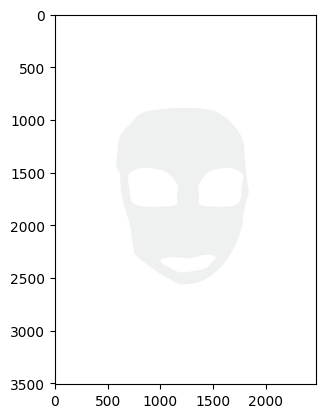

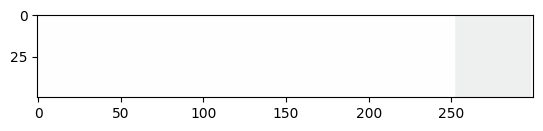

average : [252.5554555  252.86047111 252.70807164]
mode : [254.99988394 254.99992892 255.        ]


In [97]:
img_dir = f"{base_dir}/L2_24/hufmwhdokzvhtplzwyuv.jpg"
analyzeimg(img_dir)